In [1]:
import os
import itertools
import numpy as np
import pandas as pd
# PyTorch
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size': 9})

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import utils as utils
import losses

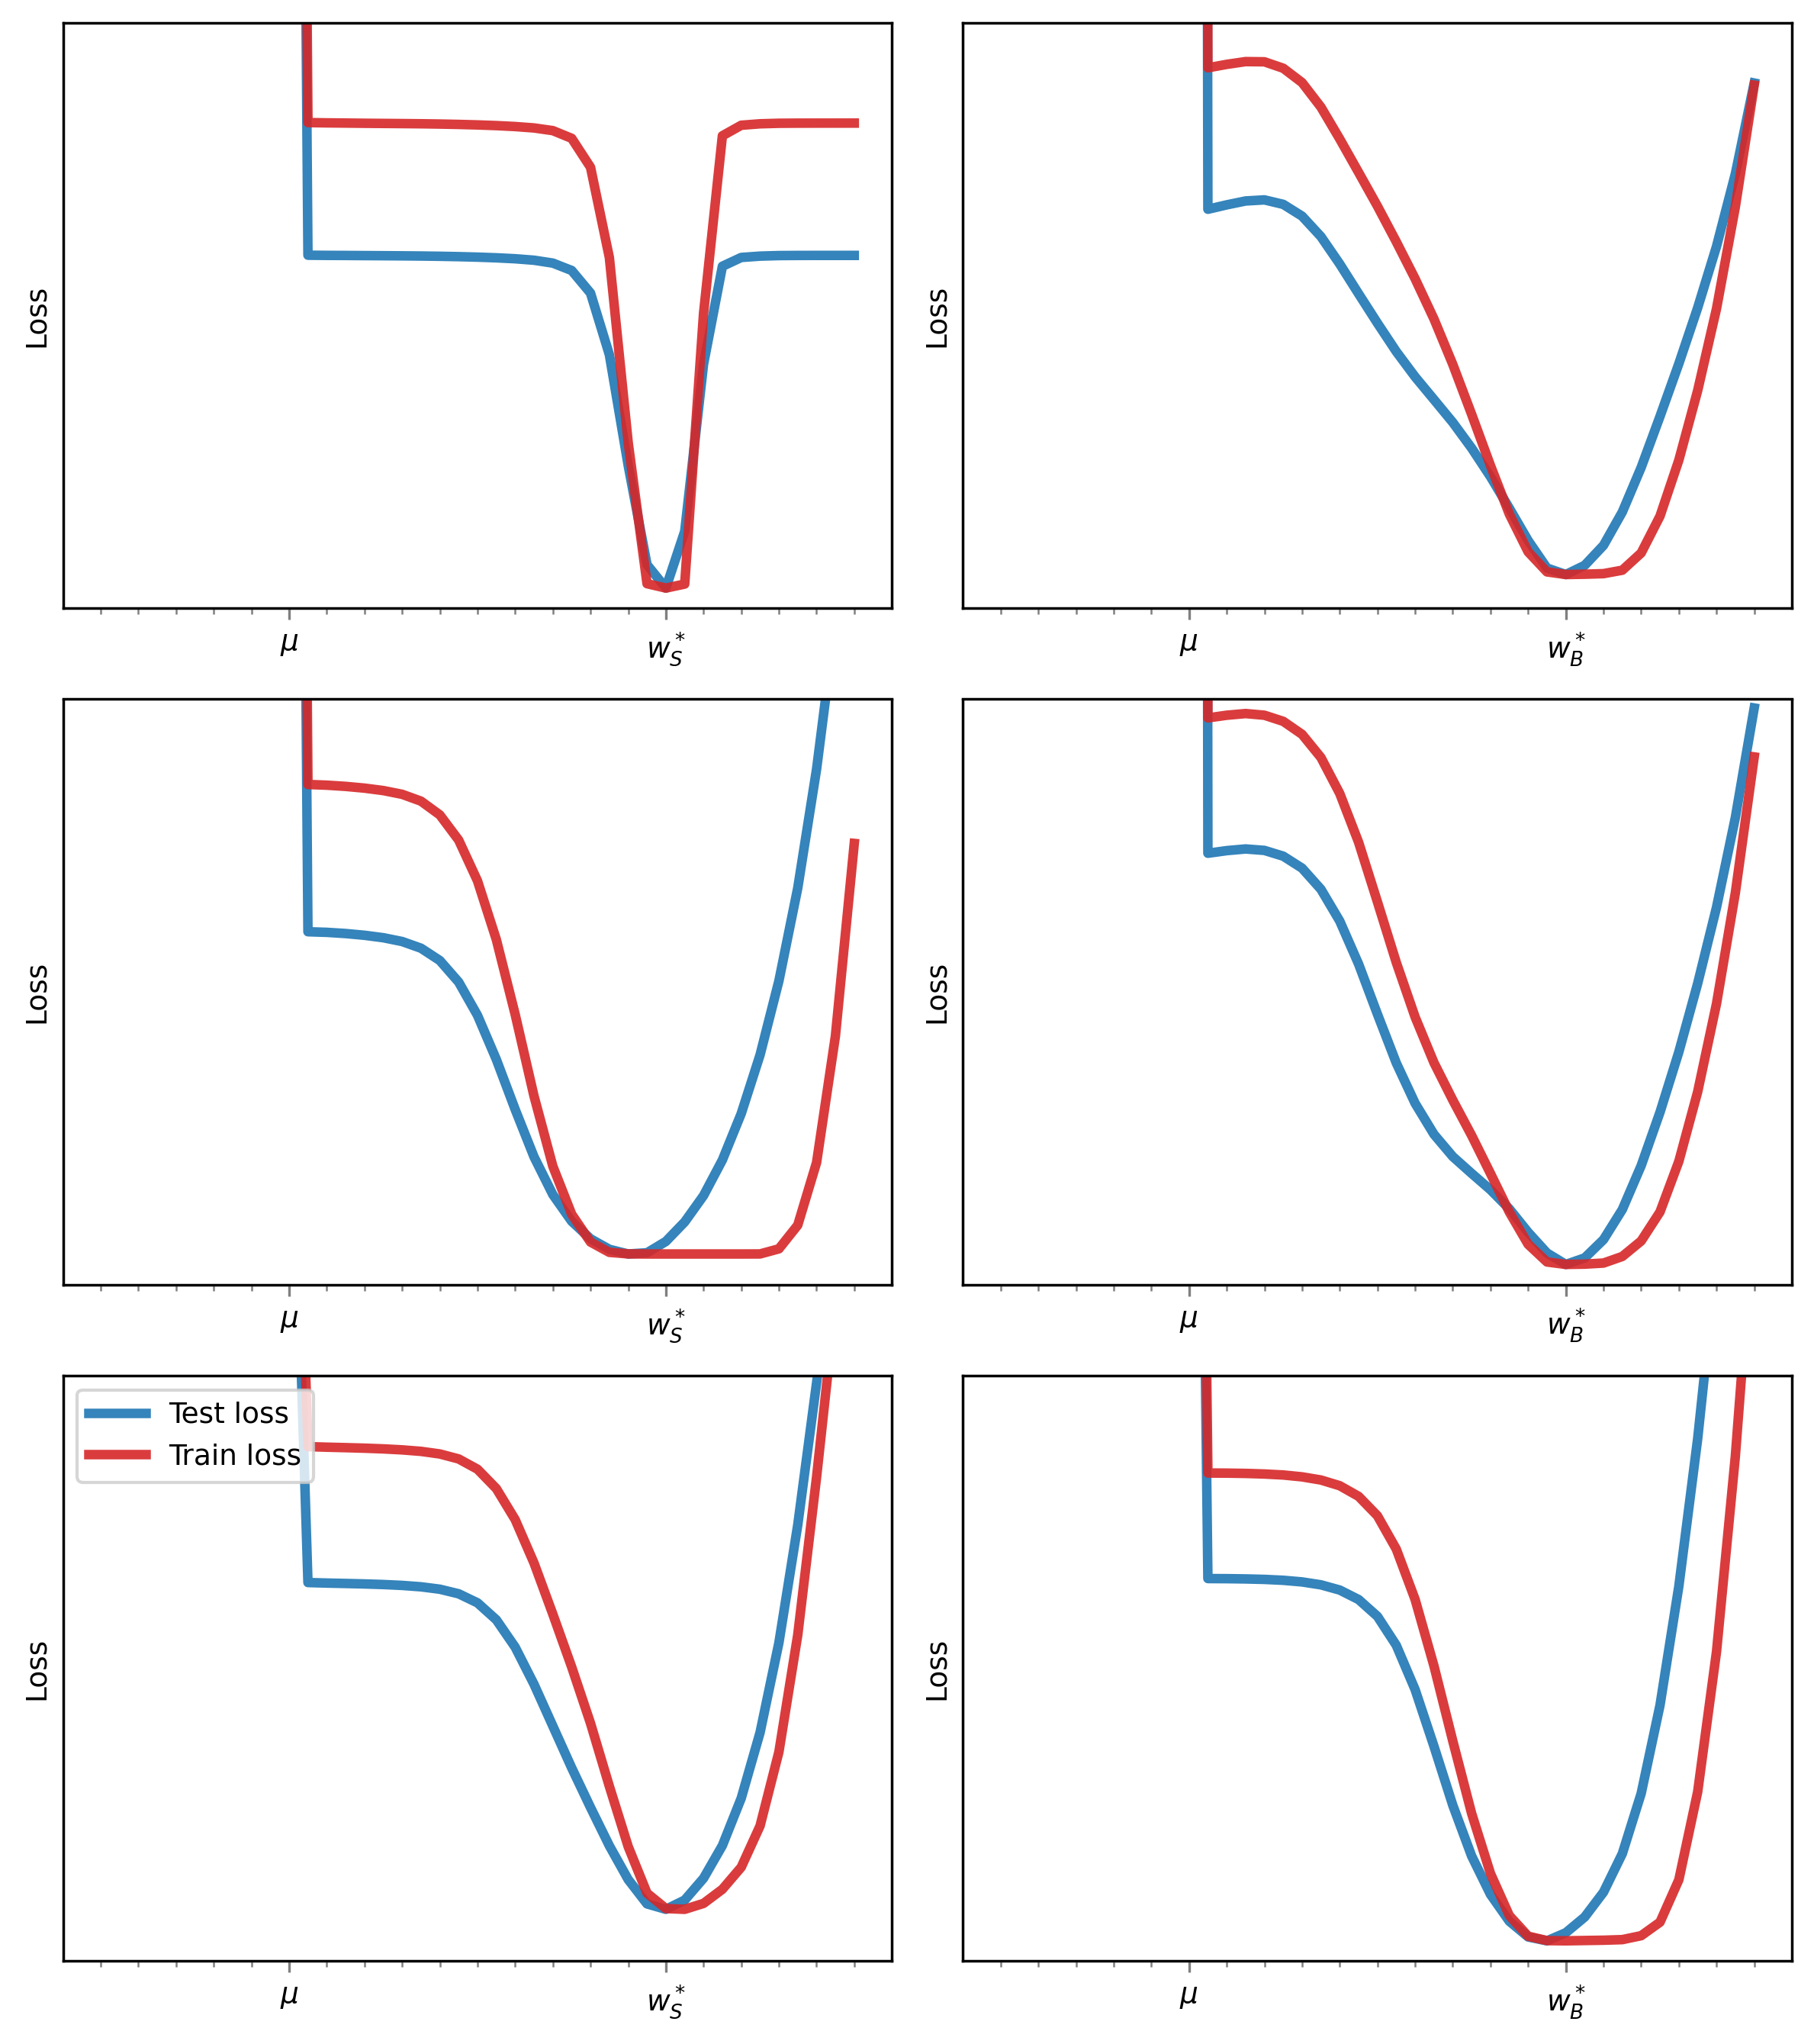

In [3]:
def color_ax(ax, color='gray'):
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.tick_params(which='both', color=color)
    
ncols, nrows = 2, 3
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

for index, (random_state, train_label, test_label) in enumerate(zip([3001, 2001, 1001], ['Train loss', None, None], ['Test loss', None, None])):
    
    nonlearned_train_losses = torch.load('./nonlearned_train_basin_random_state={}.pth'.format(random_state))
    nonlearned_test_losses = torch.load('./nonlearned_test_basin_random_state={}.pth'.format(random_state))
    learned_train_losses = torch.load('./learned_train_basin_random_state={}.pth'.format(random_state))
    learned_test_losses = torch.load('./learned_test_basin_random_state={}.pth'.format(random_state))
    
    test_lower_bound = min(min(nonlearned_test_losses), min(learned_test_losses))-0.1
    test_upper_bound = test_lower_bound+2.9
    nonlearned_train_lower_bound = min(nonlearned_train_losses)-abs(test_lower_bound-min(nonlearned_test_losses))
    nonlearned_train_upper_bound = nonlearned_train_lower_bound+2.9
    learned_train_lower_bound = min(learned_train_losses)-abs(test_lower_bound-min(learned_test_losses))
    learned_train_upper_bound = learned_train_lower_bound+2.9
    
    width = 46
    start, end = 12, 34
    
    axs[index,0].plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, alpha=0.9, color='#1f77b4', label=test_label, linewidth=3)
    # Ticks
    axs[index,0].set_xticks([10, 30])
    axs[index,0].set_xticks(np.linspace(0, 40, num=21), minor=True)
    axs[index,0].set_xticklabels([r'$\mu$', r'$w_S^*$'])
    color_ax(axs[index,0])
    axs[index,0].tick_params(axis='x', which='both')
    axs[index,0].set_ylim([test_lower_bound, test_upper_bound])
    axs[index,0].set_yticks([])
    #axs[index,0].tick_params(axis='y', labelsize=8)
    axs[index,0].set_ylabel('Loss')
    
    twin_axs0 = axs[index,0].twinx()
    twin_axs0.plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, alpha=0.9, color='#d62728', label=train_label, linewidth=3)
    twin_axs0.set_ylim([nonlearned_train_lower_bound, nonlearned_train_upper_bound])
    twin_axs0.set_yticks([])
    #twin_axs0.tick_params(axis='y', labelsize=8)

    axs[index,1].plot(range(len(learned_test_losses)), learned_test_losses, alpha=0.9, color='#1f77b4', linewidth=3)
    # Ticks
    axs[index,1].set_xticks([10, 30])
    axs[index,1].set_xticks(np.linspace(0, 40, num=21), minor=True)
    axs[index,1].set_xticklabels([r'$\mu$', r'$w_B^*$'])
    color_ax(axs[index,1])
    axs[index,1].tick_params(axis='x', which='both')
    axs[index,1].set_ylim([test_lower_bound, test_upper_bound])
    axs[index,1].set_yticks([])
    #axs[index,1].tick_params(axis='y', labelsize=8)
    axs[index,1].set_ylabel('Loss')

    twin_axs1 = axs[index,1].twinx()
    twin_axs1.plot(range(len(learned_train_losses)), learned_train_losses, alpha=0.9, color='#d62728', linewidth=3)
    twin_axs1.set_ylim([learned_train_lower_bound, learned_train_upper_bound])
    twin_axs1.set_yticks([])
    #twin_axs1.tick_params(axis='y', labelsize=8)
    
fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=axs[-1,0].transAxes)
fig.tight_layout()    
plt.savefig('basins.pdf')
plt.show()